In [2]:
import pandas as pd

weather = pd.read_csv("3303514.csv", index_col="DATE")

In [3]:
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-08,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,6.04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-09,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,5.82,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-10,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,8.72,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.662177
ACSH       0.662177
AWND       0.509162
DAPR       0.999538
FMTM       0.873403
FRGT       0.999884
MDPR       0.999538
PGTM       0.507891
PRCP       0.016302
SNOW       0.342159
SNWD       0.334990
TAVG       0.882248
TMAX       0.000636
TMIN       0.000809
TSUN       0.933464
WDF1       0.662177
WDF2       0.509105
WDF5       0.514192
WDFG       0.753338
WSF1       0.662177
WSF2       0.509047
WSF5       0.514192
WSFG       0.753338
WT01       0.777733
WT02       0.980172
WT03       0.992485
WT04       0.999769
WT05       0.998324
WT07       0.999884
WT08       0.813111
WT09       0.999884
WT16       0.886988
WT18       0.999827
dtype: float64

In [6]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [7]:
core_weather.apply(pd.isnull).sum()

precip         282
snow          5919
snow_depth    5795
temp_max        11
temp_min        14
dtype: int64

In [8]:


core_weather["snow"].value_counts()



0.0    11379
1.0        1
Name: snow, dtype: int64

In [9]:
core_weather["snow_depth"].value_counts()

0.0    11504
Name: snow_depth, dtype: int64

In [10]:
del core_weather["snow"]

In [12]:
del core_weather["snow_depth"]

In [13]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0
2016-05-08,NaN,67.0,56.0


In [14]:
core_weather["precip"].value_counts() / core_weather.shape[0]

0.00    0.810856
0.01    0.025608
0.02    0.011677
0.03    0.007110
0.04    0.006070
          ...   
1.05    0.000058
1.38    0.000058
1.95    0.000058
2.01    0.000058
1.28    0.000058
Name: precip, Length: 179, dtype: float64

In [15]:
core_weather["precip"] = core_weather["precip"].fillna(0)

core_weather.apply(pd.isnull).sum()



precip       0
temp_max    11
temp_min    14
dtype: int64

In [16]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


In [17]:
core_weather.loc["2011-12-18":"2011-12-28"]

,precip,temp_max,temp_min
DATE,,,
2011-12-18,0.0,52.0,33.0
2011-12-19,0.0,55.0,35.0
2011-12-20,0.0,61.0,35.0
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2011-12-26,0.0,50.0,32.0


In [18]:
core_weather = core_weather.fillna(method="ffill")

core_weather.apply(pd.isnull).sum()



precip      0
temp_max    0
temp_min    0
dtype: int64

In [22]:
# Check for missing value defined in data documentation
#documentation from where dataset is downloaded it stated 9's are missing values
core_weather.apply(lambda x: (x == 9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

In [23]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [24]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [25]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2023-04-03', '2023-04-04', '2023-04-05', '2023-04-06', '2023-04-07',
       '2023-04-08', '2023-04-09', '2023-04-10', '2023-04-11', '2023-04-12'],
      dtype='object', name='DATE', length=17299)

In [26]:
core_weather.index = pd.to_datetime(core_weather.index)

In [27]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2023-04-03', '2023-04-04', '2023-04-05', '2023-04-06',
               '2023-04-07', '2023-04-08', '2023-04-09', '2023-04-10',
               '2023-04-11', '2023-04-12'],
              dtype='datetime64[ns]', name='DATE', length=17299, freq=None)

<AxesSubplot:xlabel='DATE'>

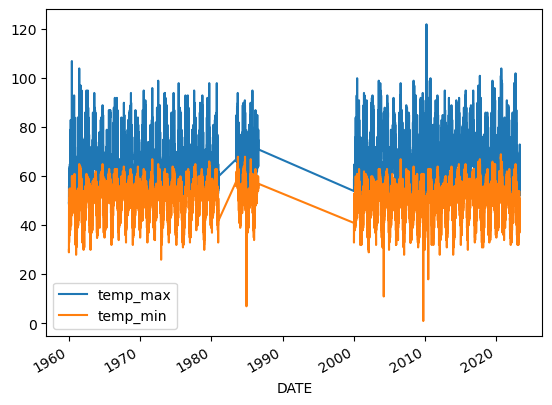

In [29]:
core_weather[["temp_max", "temp_min"]].plot()




In [30]:
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    102
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

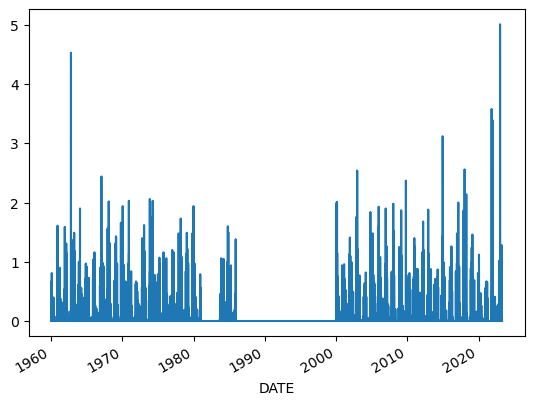

In [31]:
core_weather["precip"].plot()

<AxesSubplot:xlabel='DATE'>

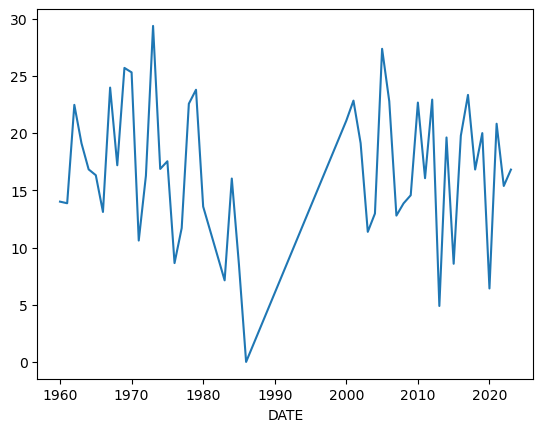

In [32]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()

In [33]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [34]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2023-04-08,0.0,65.0,48.0,73.0
2023-04-09,0.0,73.0,44.0,70.0
2023-04-10,0.0,70.0,51.0,63.0


In [35]:
core_weather = core_weather.iloc[:-1,:].copy()

In [36]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,49.0,30.0,49.0
1960-01-02,0.00,49.0,29.0,54.0
1960-01-03,0.00,54.0,35.0,54.0
1960-01-04,0.00,54.0,36.0,55.0
1960-01-05,0.00,55.0,33.0,53.0
...,...,...,...,...
2023-04-07,0.09,60.0,51.0,65.0
2023-04-08,0.00,65.0,48.0,73.0
2023-04-09,0.00,73.0,44.0,70.0


In [37]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [38]:
predictors = ["precip", "temp_max", "temp_min"]

In [39]:


train = core_weather.loc[:"2020-12-31"]
test = core_weather.loc["2021-01-01":]



In [40]:
train

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,49.0,30.0,49.0
1960-01-02,0.00,49.0,29.0,54.0
1960-01-03,0.00,54.0,35.0,54.0
1960-01-04,0.00,54.0,36.0,55.0
1960-01-05,0.00,55.0,33.0,53.0
...,...,...,...,...
2020-12-27,0.00,63.0,44.0,61.0
2020-12-28,0.10,61.0,42.0,60.0
2020-12-29,0.00,60.0,39.0,56.0


In [41]:
test

,precip,temp_max,temp_min,target
DATE,,,,
2021-01-01,0.00,60.0,40.0,57.0
2021-01-02,0.14,57.0,51.0,56.0
2021-01-03,0.00,56.0,49.0,62.0
2021-01-04,0.36,62.0,46.0,59.0
2021-01-05,0.00,59.0,42.0,59.0
...,...,...,...,...
2023-04-07,0.09,60.0,51.0,65.0
2023-04-08,0.00,65.0,48.0,73.0
2023-04-09,0.00,73.0,44.0,70.0


In [42]:


reg.fit(train[predictors], train["target"])



Ridge(alpha=0.1)

In [43]:
predictions = reg.predict(test[predictors])

In [45]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

19.997995448289377

In [47]:
from sklearn.metrics import mean_absolute_error

In [48]:
mean_absolute_error(test["target"], predictions)

3.3098799885805636

In [49]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [50]:
combined

,actual,predictions
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2023-04-07,65.0,61.583962
2023-04-08,73.0,64.849239
2023-04-09,70.0,69.899584


<AxesSubplot:xlabel='DATE'>

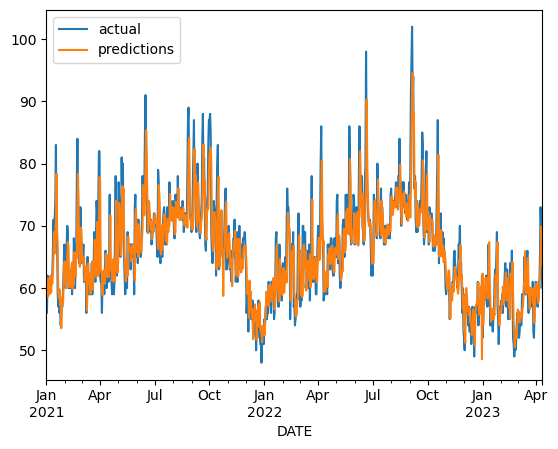

In [56]:
combined.plot()

In [58]:
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

In [59]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [60]:
core_weather = core_weather.iloc[30:,:].copy()

In [61]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_absolute_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [62]:
predictors = ["precip", "temp_max", "temp_min", "month_day_max", "max_min"]

error, combined = create_predictions(predictors, core_weather, reg)
error

3.2614561885186184

<AxesSubplot:xlabel='DATE'>

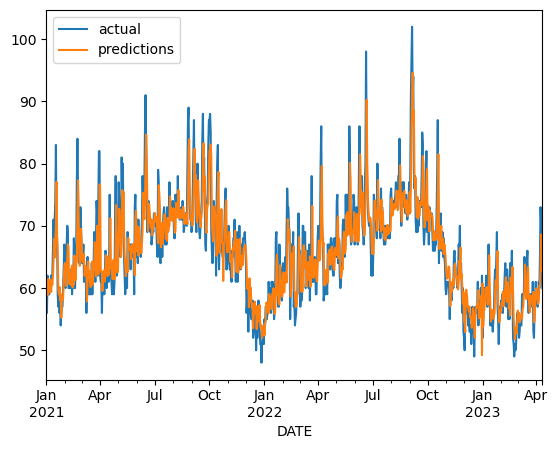

In [63]:
combined.plot()

In [76]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [77]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,NaN,0.941808,1.282609,59.000000,59.000000
1960-02-01,0.81,62.0,51.0,59.0,NaN,0.903226,1.215686,62.000000,62.000000
1960-02-02,0.00,59.0,43.0,59.0,NaN,0.951977,1.372093,60.500000,59.000000
1960-02-03,0.20,59.0,47.0,60.0,NaN,0.954802,1.255319,60.000000,59.000000
1960-02-04,0.16,60.0,42.0,60.0,NaN,0.941667,1.428571,60.000000,60.000000
...,...,...,...,...,...,...,...,...,...
2023-04-07,0.09,60.0,51.0,65.0,58.900000,0.981667,1.176471,64.515173,63.645833
2023-04-08,0.00,65.0,48.0,73.0,59.100000,0.909231,1.354167,64.515515,64.250000
2023-04-09,0.00,73.0,44.0,70.0,59.633333,0.816895,1.659091,64.521494,63.375000


In [78]:
core_weather["monthly_max"] = core_weather["month_day_max"] / core_weather["temp_max"]
core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [79]:
predictors = ["precip", "temp_max", "temp_min", "month_day_max", "max_min"]

In [ ]:
core_weather = core_weather.iloc[30:,:].copy()

In [80]:
error, combined = create_predictions(predictors, core_weather, reg)
error

3.2614561885186184

<AxesSubplot:xlabel='DATE'>

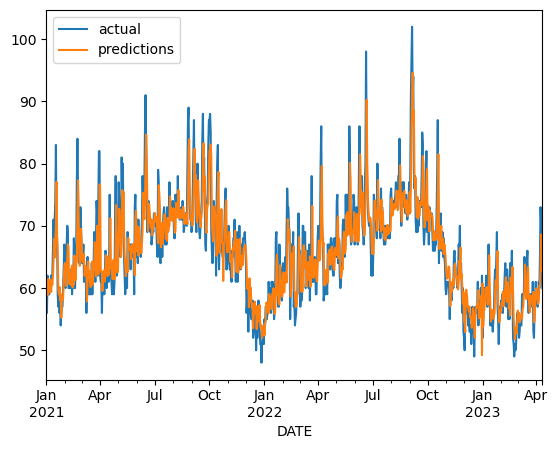

In [82]:
combined.plot()

In [83]:
core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

In [84]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg,monthly_max
DATE,,,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,NaN,0.941808,1.282609,59.000000,59.000000,0.015963
1960-02-01,0.81,62.0,51.0,59.0,NaN,0.903226,1.215686,62.000000,62.000000,0.014568
1960-02-02,0.00,59.0,43.0,59.0,NaN,0.951977,1.372093,60.500000,59.000000,0.016135
1960-02-03,0.20,59.0,47.0,60.0,NaN,0.954802,1.255319,60.000000,59.000000,0.016183
1960-02-04,0.16,60.0,42.0,60.0,NaN,0.941667,1.428571,60.000000,60.000000,0.015694
...,...,...,...,...,...,...,...,...,...,...
2023-04-07,0.09,60.0,51.0,65.0,58.900000,0.981667,1.176471,64.515173,63.645833,0.016361
2023-04-08,0.00,65.0,48.0,73.0,59.100000,0.909231,1.354167,64.515515,64.250000,0.013988
2023-04-09,0.00,73.0,44.0,70.0,59.633333,0.816895,1.659091,64.521494,63.375000,0.011190


In [85]:
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [86]:
error, combined = create_predictions(predictors + ["monthly_avg", "day_of_year_avg"], core_weather, reg)
error

3.22078935940879

In [88]:
reg.coef_

array([-1.07706522,  0.69350145,  0.04696919,  4.78060588,  0.07003167,
        0.16384976,  0.08581002])

In [89]:
core_weather.corr()["target"]

precip            -0.204227
temp_max           0.822321
temp_min           0.596719
target             1.000000
month_max          0.688072
month_day_max     -0.420820
max_min            0.044720
monthly_avg        0.691061
day_of_year_avg    0.712743
monthly_max       -0.730686
Name: target, dtype: float64

In [90]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [91]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
DATE,,,
2022-06-20,98.0,76.721867,21.278133
2022-05-23,86.0,69.676120,16.323880
2021-01-17,83.0,68.433744,14.566256
2022-09-03,91.0,76.576690,14.423310
2021-04-01,62.0,75.713379,13.713379
2021-05-07,81.0,67.678091,13.321909
2022-03-21,78.0,64.772237,13.227763
2021-02-21,77.0,64.141065,12.858935
2022-09-05,102.0,89.206001,12.793999
